In [1]:
# Dependencies and Setup
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import pprint
import json
import os

In [2]:
# Import the files per year
hhs_data = 'annual_hss_data_reduced.csv'

hhs_data_df = pd.read_csv(hhs_data, low_memory=False)

In [3]:
hhs_data_df.head()

,federal_action_obligation,action_date_fiscal_year,awarding_agency_name,awarding_sub_agency_name,recipient_parent_name
0,5250.00,2011,DEPARTMENT OF HEALTH AND HUMAN SERVICES (HHS),NATIONAL INSTITUTES OF HEALTH,HUTCHINS CONSTRUCTION INC.
1,0.00,2011,DEPARTMENT OF HEALTH AND HUMAN SERVICES (HHS),NATIONAL INSTITUTES OF HEALTH,CA INC.
2,6500.00,2011,DEPARTMENT OF HEALTH AND HUMAN SERVICES (HHS),INDIAN HEALTH SERVICE,CONTROL INSTALLATIONS OF IOWA INC.
3,3082.95,2011,DEPARTMENT OF HEALTH AND HUMAN SERVICES (HHS),CENTERS FOR MEDICARE AND MEDICAID SERVICES,LONG WAVE INC.
4,135000.00,2011,DEPARTMENT OF HEALTH AND HUMAN SERVICES (HHS),NATIONAL INSTITUTES OF HEALTH,NEXT CENTURY CORPORATION


In [4]:
hhs_data_2df = pd.DataFrame(hhs_data_df[hhs_data_df.action_date_fiscal_year!=2011])

In [5]:
hhs_data_2df

,federal_action_obligation,action_date_fiscal_year,awarding_agency_name,awarding_sub_agency_name,recipient_parent_name
81537,97.00,2012,DEPARTMENT OF HEALTH AND HUMAN SERVICES (HHS),NATIONAL INSTITUTES OF HEALTH,AMERISOURCEBERGEN CORPORATION
81538,3371.00,2012,DEPARTMENT OF HEALTH AND HUMAN SERVICES (HHS),INDIAN HEALTH SERVICE,PANASONIC CORPORATION
81539,-88.89,2012,DEPARTMENT OF HEALTH AND HUMAN SERVICES (HHS),HEALTH RESOURCES AND SERVICES ADMINISTRATION,HUMANITAS INC.
81540,8156.01,2012,DEPARTMENT OF HEALTH AND HUMAN SERVICES (HHS),HEALTH RESOURCES AND SERVICES ADMINISTRATION,HUMANITAS INC.
81541,0.00,2012,DEPARTMENT OF HEALTH AND HUMAN SERVICES (HHS),NATIONAL INSTITUTES OF HEALTH,MEDICAL SCIENCE & COMPUTING INC
81542,-15978.11,2012,DEPARTMENT OF HEALTH AND HUMAN SERVICES (HHS),NATIONAL INSTITUTES OF HEALTH,UNIVERSITY OF HAWAII
81543,20941.50,2012,DEPARTMENT OF HEALTH AND HUMAN SERVICES (HHS),NATIONAL INSTITUTES OF HEALTH,LODGING OPPORTUNITIES CORP
81544,40393.28,2012,DEPARTMENT OF HEALTH AND HUMAN SERVICES (HHS),NATIONAL INSTITUTES OF HEALTH,THI IV BETHESDA LESSEE LLC
81545,3463.50,2012,DEPARTMENT OF HEALTH AND HUMAN SERVICES (HHS),NATIONAL INSTITUTES OF HEALTH,A. DAIGGER AND COMPANY INCORPORATED
81546,-4003.27,2012,DEPARTMENT OF HEALTH AND HUMAN SERVICES (HHS),NATIONAL INSTITUTES OF HEALTH,LIFE TECHNOLOGIES CORPORATION


### Binning

In [107]:
bin_edges = [-(1.0E12),-(1.0E2),1.0E2,2.50E5,1.0E6,1.0E8,1.0E12]
bin_labels = ['Less than -\$100','-\$100 to +\$100','\$100 to \$250K','\$250K to \$1mil','\$1mil to \$100mil','Greater than \$100mil']

hhs_data_2df['bin'] = pd.cut(
    hhs_data_2df['federal_action_obligation'],
    bin_edges,
    labels=bin_labels,
    right=True,
    include_lowest=True
)

# hhs_data_2df['bin'].value_counts()

In [108]:
counting = hhs_data_2df.groupby(['action_date_fiscal_year','bin'])['federal_action_obligation'].count()

bin_count_df = pd.DataFrame(counting)
bin_count_df.reset_index(inplace=True)

In [109]:
bin_count_df.rename({'federal_action_obligation':'contract_count','action_date_fiscal_year':'fiscal_year'},axis=1,inplace=True)
bin_count_df

,fiscal_year,bin,contract_count
0,2012,Less than -\$100,11366
1,2012,-\$100 to +\$100,16807
2,2012,\$100 to \$250K,47231
3,2012,\$250K to \$1mil,4037
4,2012,\$1mil to \$100mil,2502
5,2012,Greater than \$100mil,23
6,2013,Less than -\$100,12524
7,2013,-\$100 to +\$100,18244
8,2013,\$100 to \$250K,45636
9,2013,\$250K to \$1mil,3913


In [110]:
bin_pivot_df = pd.DataFrame((bin_count_df.pivot('fiscal_year','bin','contract_count')))
# bin_pivot_df.reset_index(inplace=True)
bin_pivot_df

bin,Less than -\$100,-\$100 to +\$100,\$100 to \$250K,\$250K to \$1mil,\$1mil to \$100mil,Greater than \$100mil
fiscal_year,,,,,,
2012,11366,16807,47231,4037,2502,23
2013,12524,18244,45636,3913,2549,23
2014,14134,19724,46975,3985,2785,24
2015,12071,13650,51335,4073,2969,14
2016,10865,12642,49696,4373,3115,5
2017,11931,14517,48794,4526,3201,16
2018,11896,13400,43440,4673,3362,14
2019,11604,14160,33512,4743,3362,15


<IPython.core.display.Javascript object>


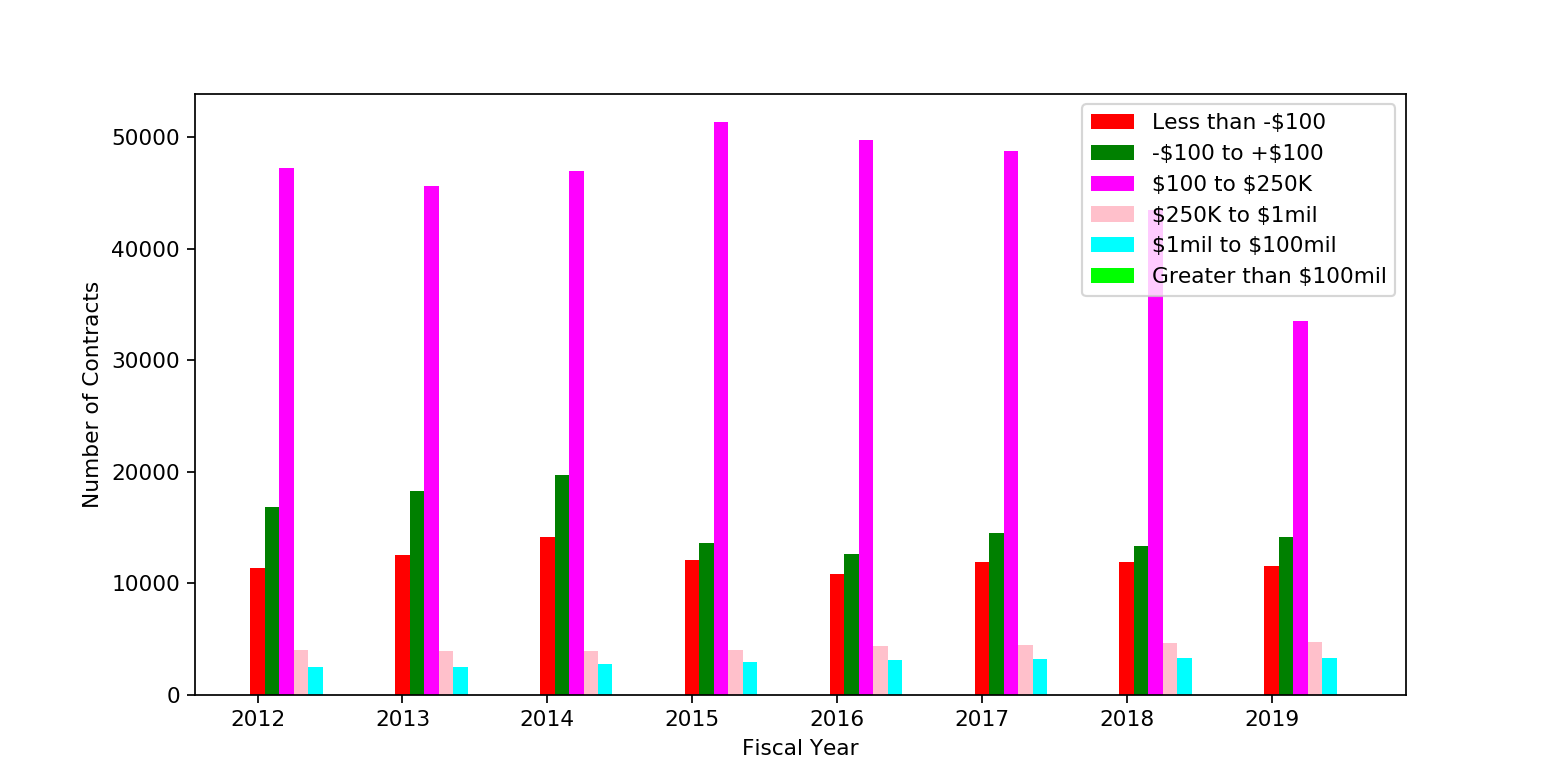

In [113]:
# fig, ax = plt.subplots()
# rects1 = ax.bar(bin_count_df['bin'],[bin_count_df.loc['fiscal_year']==2012,bin_count_df['contract_count']])
# bin_count_array = np.asarray(bin_count_df)


# The trouble with using dates as x-values, is that if you want a bar chart like in your second picture, they are going to be wrong. You should either use a stacked bar chart (colours on top of each other) or group by date (a "fake" date on the x-axis, basically just grouping the data points).

# N = 3
# ind = np.arange(N)# the x locations for the groups
ind = np.arange(len(bin_pivot_df.index))
width = 0.1       # the width of the bars

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)

bin_1 = bin_pivot_df.iloc[:,0]
rects1 = ax.bar(ind+width*0, bin_1, width, color='r')
bin_2 = bin_pivot_df.iloc[:,1]
rects2 = ax.bar(ind+width*1, bin_2, width, color='g')
bin_3 = bin_pivot_df.iloc[:,2]
rects3 = ax.bar(ind+width*2, bin_3, width, color='magenta')
bin_4 = bin_pivot_df.iloc[:,3]
rects4 = ax.bar(ind+width*3, bin_4, width, color='pink')
bin_5 = bin_pivot_df.iloc[:,4]
rects5 = ax.bar(ind+width*4, bin_5, width, color='aqua')
bin_6 = bin_pivot_df.iloc[:,5]
rects6 = ax.bar(ind+width*5, bin_6, width, color='lime')

ax.set_ylabel('Number of Contracts')
ax.set_xlabel('Fiscal Year')
# ax.set_title('Contract Distribution per Fiscal Year')
ax.set_xticks(ind)

x_labels = []
for year in bin_pivot_df.index:
    if year not in x_labels:
        x_labels.append(year)
x_labels_sorted=sorted(x_labels)
x_labels_sorted

ax.set_xticklabels(x_labels_sorted)

ax.legend(bin_pivot_df)

fig.show()

# zvals = [1,2,3]
# rects2 = ax.bar(ind+width, zvals, width, color='g')
# kvals = [11,12,13]
# rects3 = ax.bar(ind+width*2, kvals, width, color='b')

# ax.set_ylabel('Scores')
# ax.set_xticks(ind+width)
# ax.set_xticklabels( ('2011-Jan-4', '2011-Jan-5', '2011-Jan-6') )
# ax.legend( (rects1[0], rects2[0], rects3[0]), ('y', 'z', 'k') )

# def autolabel(rects):
#     for rect in rects:
#         h = rect.get_height()
#         ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
#                 ha='center', va='bottom')

# autolabel(rects1)
# autolabel(rects2)
# autolabel(rects3)

plt.savefig(f"ZM_Fig1.png")

24

<IPython.core.display.Javascript object>


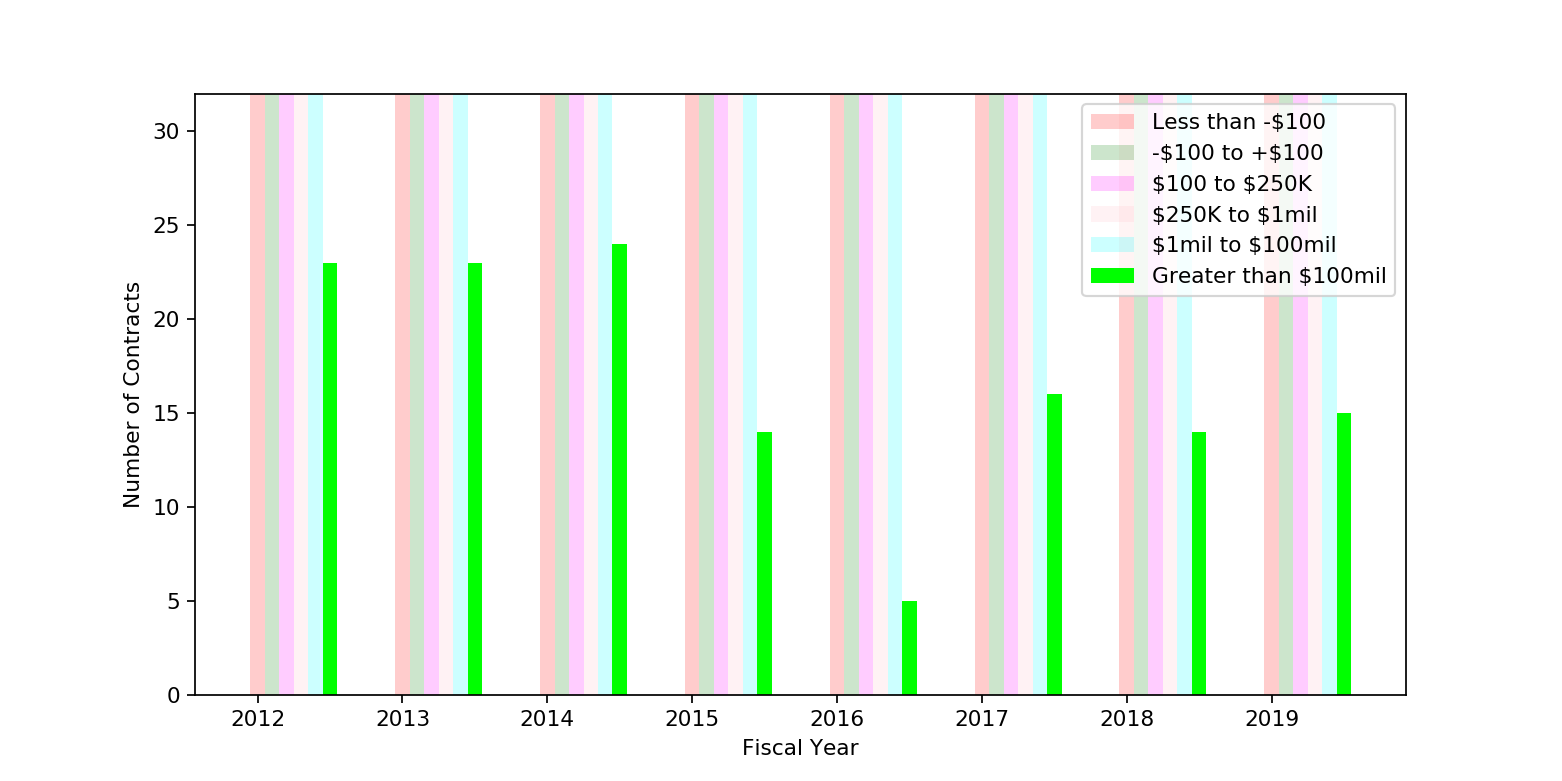

In [114]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)

bin_1 = bin_pivot_df.iloc[:,0]
rects1 = ax.bar(ind+width*0, bin_1, width, color='r',alpha=0.2)
bin_2 = bin_pivot_df.iloc[:,1]
rects2 = ax.bar(ind+width*1, bin_2, width, color='g',alpha=0.2)
bin_3 = bin_pivot_df.iloc[:,2]
rects3 = ax.bar(ind+width*2, bin_3, width, color='magenta',alpha=0.2)
bin_4 = bin_pivot_df.iloc[:,3]
rects4 = ax.bar(ind+width*3, bin_4, width, color='pink',alpha=0.2)
bin_5 = bin_pivot_df.iloc[:,4]
rects5 = ax.bar(ind+width*4, bin_5, width, color='aqua',alpha=0.2)
bin_6 = bin_pivot_df.iloc[:,5]
rects6 = ax.bar(ind+width*5, bin_6, width, color='lime')

ax.set_ylabel('Number of Contracts')
ax.set_xlabel('Fiscal Year')
# ax.set_title('Contract Distribution per Fiscal Year')
ax.set_xticks(ind)

x_labels = []
for year in bin_pivot_df.index:
    if year not in x_labels:
        x_labels.append(year)
x_labels_sorted=sorted(x_labels)
x_labels_sorted

ax.set_xticklabels(x_labels_sorted)

ax.legend(bin_pivot_df)

ax.set_ylim(ymax=(bin_6.max())*4/3)

fig.show()

plt.savefig(f"ZM_Fig2.png")

In [ ]:
users = [13000, 26000, 52000, 30000, 9000]
x_axis = np.arange(len(users))
plt.bar(x_axis, users, color='r', alpha=0.5, align="center")

In [ ]:
# (reduct_3_df['bin'].value_counts(sort=False)).max()
# (reduct_3_df.loc[reduct_3_df['bin']=='$1mil to $100mil']).count()
# reduct_3_df.count()
bin_counts={}
for thing in bin_labels:
    bin_counts[thing] = (len(hhs_data_2df.loc[hhs_data_2df['bin']==thing]))



In [ ]:
# hhs_data_2df.loc[hhs_data_2df['action_date_fiscal_year']==2012,['bin']]
# hhs_data_2df.loc[lambda hhs_data_2df: (hhs_data_2df['action_date_fiscal_year']==2012)]